<h1 style="text-align: justify;"><span style="color: #339966;"><strong>APPRENTICE CHEF 👩🏽&zwj;🍳</strong></span></h1>
<blockquote>
<p><span style="color: #333333;">A2. Written Individual Assignment- Classification Modelling Case Study</span></p>
<p><strong><span style="color: #333333;">Ayara Rebekah Raquel Pontioso</span></strong></p>
<p><span style="color: #333333;">FMSBA5- Valencia</span></p>
<p><span style="color: #333333;">Hult International Business School</span></p>
</blockquote>

In [1]:
#### Uploading our packages

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import random as rand
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

#### Yaaaasss

In [2]:
#### Importing our dataset

file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file)

In [3]:
#### Learning which variables I'm gonna be playing with

original_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

In [4]:
#### Do we have missing values? 

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [5]:
original_df.isnull().sum()

#### Missing values in 'Family Names'

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [6]:
#### Do I need 'Family Names' for future reference?

original_df = original_df.dropna()

#### Short answer: NO

In [7]:
##### Blueprinting 

lm_revenue_tot_ord = smf.ols(formula = """CROSS_SELL_SUCCESS ~ original_df['TOTAL_MEALS_ORDERED']""",
                        data = original_df)

results = lm_revenue_tot_ord.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2055
Date:                Sun, 15 Mar 2020   Prob (F-statistic):              0.650
Time:                        23:21:27   Log-Likelihood:                -1249.9
No. Observations:                1899   AIC:                             2504.
Df Residuals:                    1897   BIC:                             2515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [8]:
#### Checking the disctribution of data

original_df.loc[:, :].quantile([0.10,
                         0.25,
                         0.50,
                         0.75,
                         1.00])

#### Did I get anything out of this? We'll see. 

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  \
0.10  1100.00                 0.0                 15.8                 2.0   
0.25  1350.00                 0.0                 39.0                 3.0   
0.50  1745.00                 1.0                 60.0                 5.0   
0.75  2670.00                 1.0                 95.0                 7.0   
1.00  8793.75                 1.0                493.0                19.0   

      CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  \
0.10                          4.0                        2.0   
0.25                          5.0                        3.0   
0.50                          7.0                        5.0   
0.75                          8.0                        8.0   
1.00                         18.0                       10.0   

      AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  \
0.10                   43.638            0.0                        0.0   
0.25                   72.000            1.0                        0.0   
0.50                   94.120            1.0                        1.0   
0.75                  117.570            1.0                        2.0   
1.00                 1645.600            1.0                       13.0   

      CANCELLATIONS_AFTER_NOON  ...  LATE_DELIVERIES  PACKAGE_LOCKER  \
0.10                       0.0  ...              0.0             0.0   
0.25                       0.0  ...              1.0             0.0   
0.50                       0.0  ...              2.0             0.0   
0.75                       0.0  ...              4.0             1.0   
1.00                       3.0  ...             19.0             1.0   

      REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  \
0.10                  0.0                          10.0              91.90   
0.25                  0.0                          10.0             114.35   
0.50                  0.0                          30.0             145.60   
0.75                  0.0                          60.0             173.80   
1.00                  1.0                          90.0             564.20   

      LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  \
0.10                 3.0                      0.0                 2.0   
0.25                 3.0                      0.0                 2.0   
0.50                 4.0                      1.0                 3.0   
0.75                 5.0                      1.0                 3.0   
1.00                11.0                      3.0                 5.0   

      AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  
0.10                  11.0                  0.0  
0.25                  12.0                  0.0  
0.50                  13.0                  0.0  
0.75                  15.0                174.0  
1.00                  19.0               1600.0  

[5 rows x 25 columns]

In [9]:
#### Descriptive Stats time

original_df.loc[:,'REVENUE':'TOTAL_PHOTOS_VIEWED'].describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  \
count  1899.00             1899.00              1899.00             1899.00   
mean   2109.66                0.68                74.77                4.91   
std    1140.78                0.47                55.43                2.50   
min     131.00                0.00                11.00                1.00   
25%    1350.00                0.00                39.00                3.00   
50%    1745.00                1.00                60.00                5.00   
75%    2670.00                1.00                95.00                7.00   
max    8793.75                1.00               493.00               19.00   

       CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  \
count                      1899.00                    1899.00   
mean                          6.98                       5.37   
std                           2.28                       3.04   
min                           1.00                       1.00   
25%                           5.00                       3.00   
50%                           7.00                       5.00   
75%                           8.00                       8.00   
max                          18.00                      10.00   

       AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  \
count                  1899.00        1899.00                    1899.00   
mean                     99.86           0.88                       1.41   
std                      62.91           0.33                       1.55   
min                      10.33           0.00                       0.00   
25%                      72.00           1.00                       0.00   
50%                      94.12           1.00                       1.00   
75%                     117.57           1.00                       2.00   
max                    1645.60           1.00                      13.00   

       CANCELLATIONS_AFTER_NOON  ...  LATE_DELIVERIES  PACKAGE_LOCKER  \
count                   1899.00  ...          1899.00         1899.00   
mean                       0.17  ...             2.97            0.36   
std                        0.43  ...             2.74            0.48   
min                        0.00  ...             0.00            0.00   
25%                        0.00  ...             1.00            0.00   
50%                        0.00  ...             2.00            0.00   
75%                        0.00  ...             4.00            1.00   
max                        3.00  ...            19.00            1.00   

       REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  \
count              1899.00                       1899.00            1899.00   
mean                  0.11                         35.60             150.67   
std                   0.32                         26.58              49.75   
min                   0.00                          0.00              33.40   
25%                   0.00                         10.00             114.35   
50%                   0.00                         30.00             145.60   
75%                   0.00                         60.00             173.80   
max                   1.00                         90.00             564.20   

       LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  \
count             1899.00                  1899.00             1899.00   
mean                 4.44                     0.61                2.79   
std                  1.56                     0.64                0.76   
min                  0.00                     0.00                1.00   
25%                  3.00                     0.00                2.00   
50%                  4.00                     1.00                3.00   
75%                  5.00                     1.00                3.00   
max                 11.00                     3.00            

<p><span style="color: #808000;"><strong>Checkpoint:</strong></span></p>
<blockquote>
<p>Our dataset is now clean as I please. Good thing our missing values do not require that much work. With our OLS Regression Results, Quantile Distribution, Descriptive Statistics, these information would guide us through our grpahs and models later on. &nbsp;</p>
</blockquote>

Text(0.5, 0, 'Meal Rating')

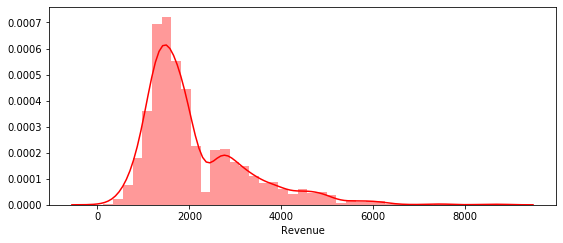

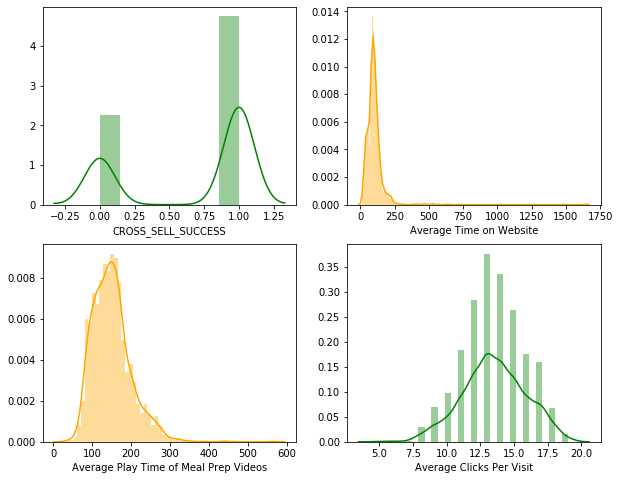

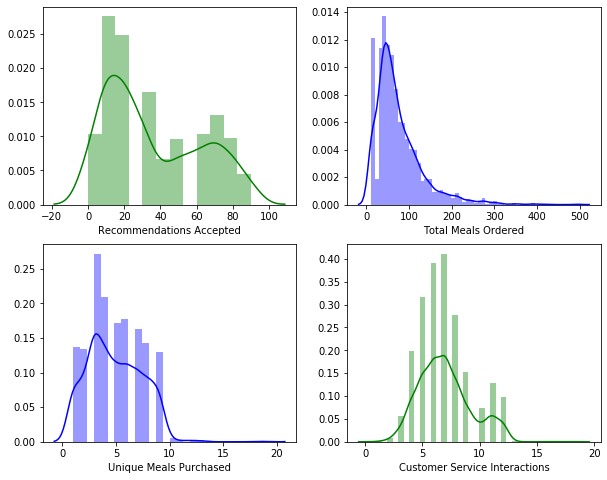

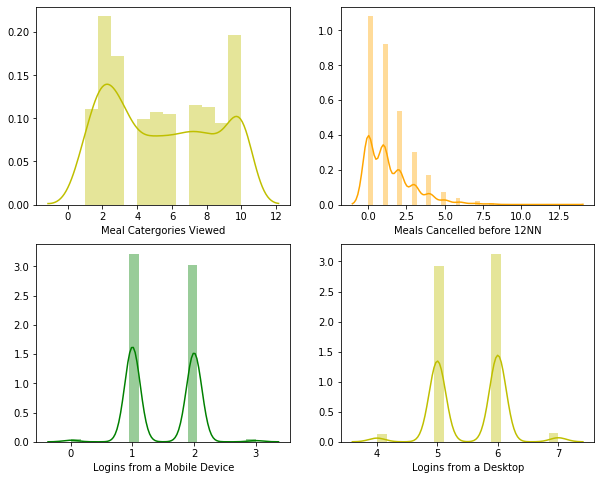

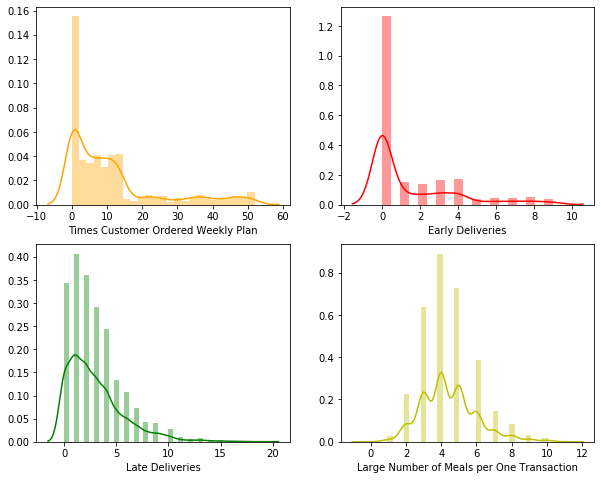

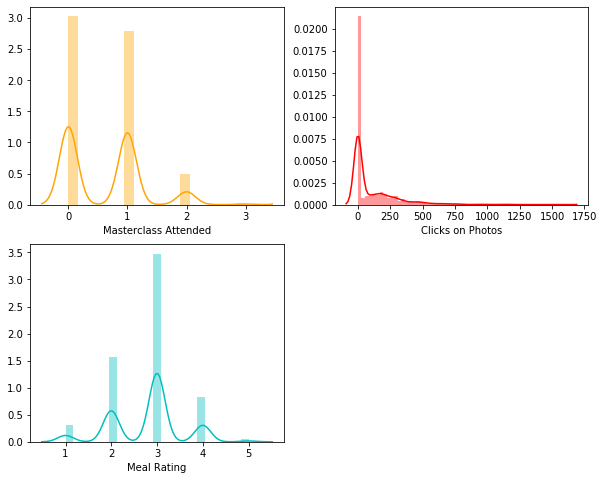

In [10]:
#### Checking the density of our data

fig, ax = plt.subplots(figsize = (20, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Revenue')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Average Time on Website')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Average Play Time of Meal Prep Videos')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Average Clicks Per Visit')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Recommendations Accepted')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Total Meals Ordered')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('Unique Meals Purchased')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Customer Service Interactions')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Meal Catergories Viewed')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Meals Cancelled before 12NN')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Logins from a Mobile Device')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Logins from a Desktop')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Times Customer Ordered Weekly Plan')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Early Deliveries')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Late Deliveries')

#

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Large Number of Meals per One Transaction')

#

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('Masterclass Attended')

#

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('Clicks on Photos')

#

plt.subplot(2, 2, 3)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'c')
plt.xlabel('Meal Rating')


<p><span style="color: #808000;"><strong>Checkpoint:</strong></span></p>
<blockquote>
<p>For every possible variable, we see the density of our samples through the wavey lines over the histogram. If the bar, goes beyond this waves, it means that we have outliers at this point. This being said, we can now determine at which aspect of Apprentice Chef is feeling a lil rebellious:</p>
<ul>
<li>Ave Clicks per Visit</li>
<li>Followed Recommenddations</li>
<li>Total Meals Ordered</li>
<li>Unique Meal Purchased</li>
<li>Interaction w/ Customer Service</li>
<li>Total Number of Meal Categories Viewed0</li>
<li>Meals Cancelled Before 12NN</li>
<li>Logins from Mobile Device</li>
<li>Logins from Website</li>
<li>Weekly Plan Consistency</li>
<li>Early Deliveries</li>
<li>Late Deliveries</li>
<li>Large Orders in One Transaction</li>
<li>Times Customer Attended Masterclass</li>
<li>Total Click in Photos</li>
<li>Median Meal Rating</li>
</ul>
</blockquote>

In [11]:
#### Now to set thresholds made by our lil rebels

REVENUE_HI = 1000
AVE_TIME_PER_SITE_VISIT_HI = 500
AVE_PREP_VID_TIME_LO = 50
AVE_PREP_VID_TIME_HI = 125
AVE_CLICKS_PER_VISIT_LO = 2
AVE_CLICKS_PER_VISIT_HI = 19
RECOMMENDATIONS_HI = 40
TOTAL_MEALS_ORDERED_HI = 120
UNIQUE_MEALS_PURCH_HI = 8
CUSTOMER_SERVICE_HI = 16
PRODUCT_CATEGORIES_VIEWED_LO = 1
PRODUCT_CATEGORIES_VIEWED_HI = 15
CANCELLATIONS_BEFORE_NN_HI = 7
MOBILE_LOGINS_LO = 5
MOBILE_LOGINS_HI = 7
PC_LOGINS_LO = 1
PC_LOGINS_HI = 6
WEEKLY_PLAN_HI = 2
EARLY_DELIVERIES_HI = 7
LATE_DELIVERIES_HI = 15
LARGE_ORDER_SIZE_LO = 12
LARGE_ORDER_SIZE_HI = 8
MASTER_CLASSES_ATTENDED_HI = 3
TOTAL_PHOTOS_VIEWED_HI = 200
MEDIAN_MEAL_RATING_HI = 3

In [12]:
#### Feature Engineering time!

# Revenue
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_HI]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average time per visit
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT']\
                              [original_df['AVG_TIME_PER_SITE_VISIT'] > AVE_TIME_PER_SITE_VISIT_HI]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average duration of prep time
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME']\
                              [original_df['AVG_PREP_VID_TIME'] > AVE_PREP_VID_TIME_HI]
condition_lo = original_df.loc[0:,'out_AVG_PREP_VID_TIME']\
                              [original_df['AVG_PREP_VID_TIME'] < AVE_PREP_VID_TIME_LO]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Average clicks per visit
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] > AVE_CLICKS_PER_VISIT_HI]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] < AVE_CLICKS_PER_VISIT_LO]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Recommendations Accepted
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT']\
                              [original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > RECOMMENDATIONS_HI]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Meals Ordered
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED']\
                              [original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals Purchased
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH']\
                              [original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Interactions with customer service
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE']\
                              [original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CUSTOMER_SERVICE_HI]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Categories Viewed
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_LO]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Early Cancellations
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON']\
                              [original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NN_HI]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Mobile Logins
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_LO]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# PC Logins
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] > PC_LOGINS_HI]
condition_lo = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] < PC_LOGINS_LO]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Weekly Plan
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN']\
                              [original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early Deliveries
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES']\
                              [original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES']\
                              [original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Large Order Size
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['LARGEST_ORDER_SIZE'] > LARGE_ORDER_SIZE_HI]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] < LARGE_ORDER_SIZE_LO]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Masterclasses Attended
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED']\
                              [original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Photos Viewed
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED']\
                              [original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Meal Rating
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING']\
                              [original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

<h4><span style="color: #808000;">Checkpoint:</span></h4>
<blockquote>
<p><span style="color: #000000;">We have set our outlier thresholds onto the variables that were previously mentioned. We now try to see if they are still a contributing factor for our revenue drive.&nbsp;</span></p>
</blockquote>

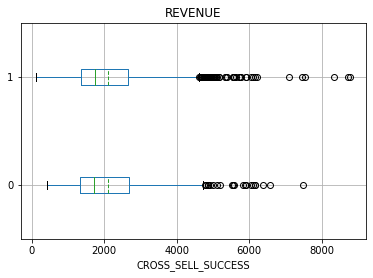

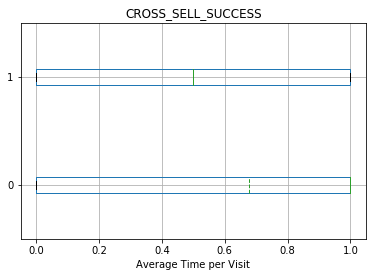

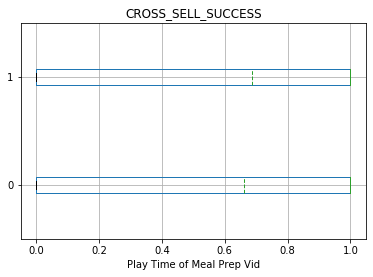

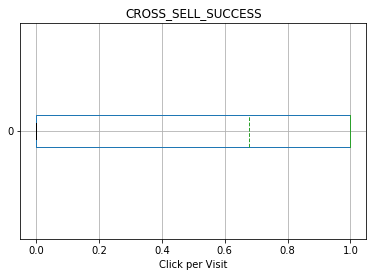

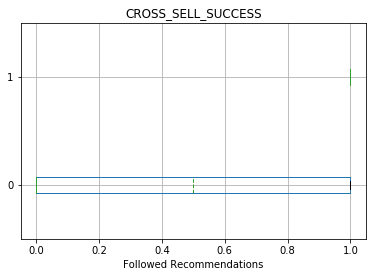

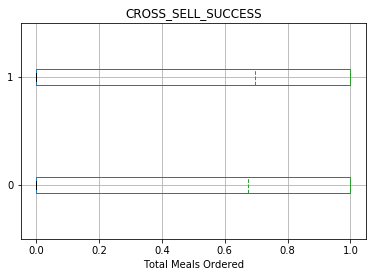

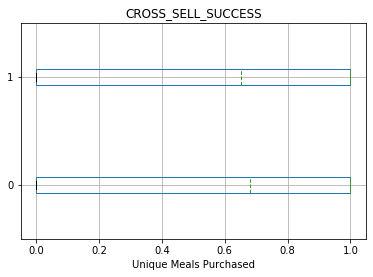

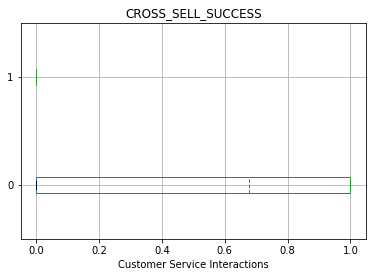

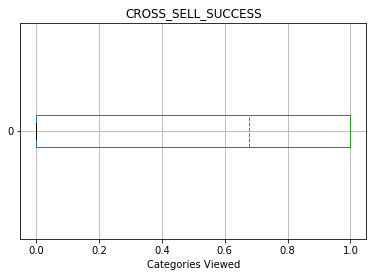

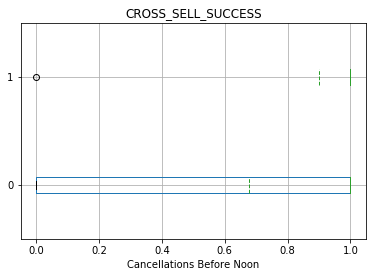

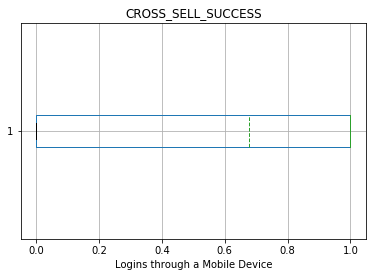

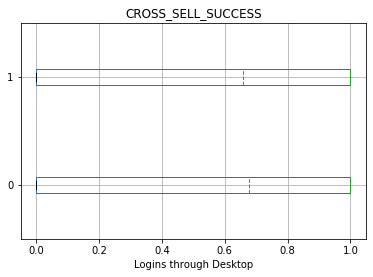

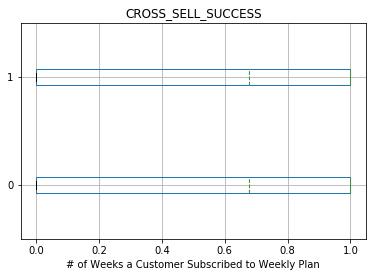

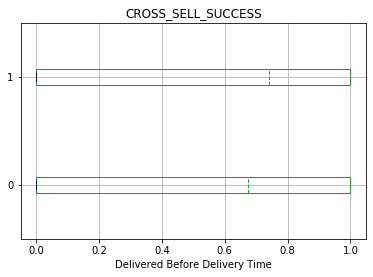

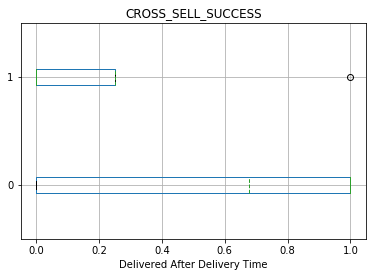

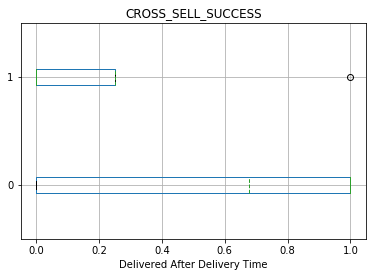

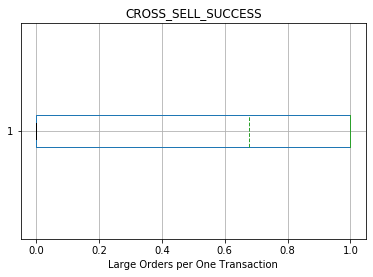

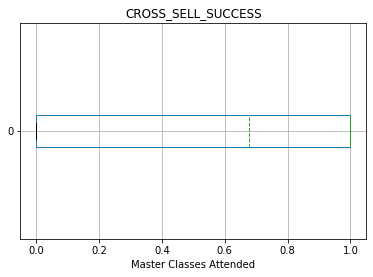

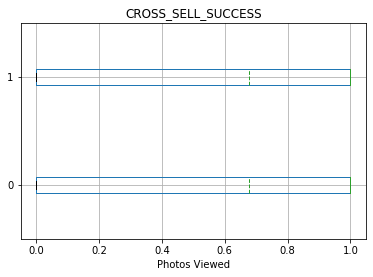

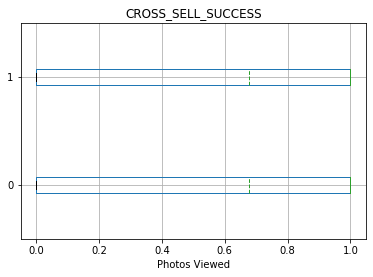

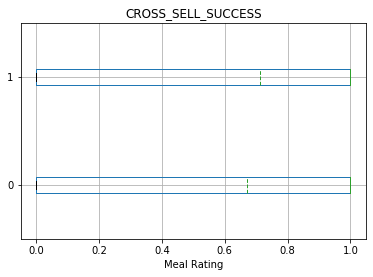

In [13]:
#### Exploratory Data Analysis time (through boxplots)


# Revenue & Cross Sell Success
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = original_df)

# Revenue & Average Time per Visit
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Average Time per Visit')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_AVG_TIME_PER_SITE_VISIT',
					 data     = original_df)

# 
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Play Time of Meal Prep Vid')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_AVG_PREP_VID_TIME',
					 data     = original_df)

# 
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Click per Visit')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_AVG_CLICKS_PER_VISIT',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Followed Recommendations')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_FOLLOWED_RECOMMENDATIONS_PCT',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Total Meals Ordered')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_TOTAL_MEALS_ORDERED',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Unique Meals Purchased')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_UNIQUE_MEALS_PURCH',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Customer Service Interactions')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_CONTACTS_W_CUSTOMER_SERVICE',
					 data     = original_df)

# 
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Categories Viewed')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_PRODUCT_CATEGORIES_VIEWED',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Cancellations Before Noon')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_CANCELLATIONS_BEFORE_NOON',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Logins through a Mobile Device')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_MOBILE_LOGINS',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Logins through Desktop')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_PC_LOGINS',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('# of Weeks a Customer Subscribed to Weekly Plan')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_WEEKLY_PLAN',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Delivered Before Delivery Time')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_EARLY_DELIVERIES',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Delivered After Delivery Time')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_LATE_DELIVERIES',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Delivered After Delivery Time')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_LATE_DELIVERIES',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Large Orders per One Transaction')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_LARGEST_ORDER_SIZE',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Master Classes Attended')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_MASTER_CLASSES_ATTENDED',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Photos Viewed')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_TOTAL_PHOTOS_VIEWED',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Photos Viewed')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_TOTAL_PHOTOS_VIEWED',
					 data     = original_df)

#
def categorical_boxplots(response, cat_var, data):

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)
    
    plt.xlabel('Meal Rating')
    plt.suptitle("")
    plt.show()


categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'out_MEDIAN_MEAL_RATING',
					 data     = original_df)

############################################################this line number is an anagram of 420

<h4><span style="color: #808000;">Checkpoint:</span></h4>
<blockquote>
<p>Some of our variables still need some working on. Most of them still have quite a number of outliers. In order to conclude with a most desirable model, we are going to have to perform another round of feature engineering to certain variables.</p>
<p>First off, we have to create a new column to associate with our new threshold based on the new changes as our developing features.</p>
</blockquote>

In [14]:
#### New threshold time!

AVG_TIME_PER_SITE_VISIT_CHANGE_HI = 200
AVE_PREP_VID_CHANGE_HI = 250
CUSTOMER_SERVICE_CHANGE_HI = 10
TOTAL_MEALS_ORDERED_CHANGE_HI = 25 
TOTAL_PHOTOS_VIEWED_CHANGE  = 0 
MEDIAN_MEAL_RATING_CHANGE_3 = 3
MEDIAN_MEAL_RATING_CHANGE_4 = 4


In [15]:
#### Feature Engineering time once again

#
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT']\
            [original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_CHANGE_HI]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

#
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME']\
            [original_df['AVG_PREP_VID_TIME'] > AVE_PREP_VID_CHANGE_HI]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

#
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE']\
            [original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CUSTOMER_SERVICE_CHANGE_HI]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

#
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED']\
            [original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_CHANGE_HI]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

#
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED']\
            [original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#
original_df['change_MEDIAN_MEAL_RATING_3'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_3']\
            [original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_3]

original_df['change_MEDIAN_MEAL_RATING_3'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

#
original_df['change_MEDIAN_MEAL_RATING_4'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_4']\
            [original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_4]

original_df['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

<h4><span style="color: #808000;">Checkpoint:</span></h4>
<blockquote>
<p>Now that we have our outliers fixed, we may now proceed to building our models.</p>
<p></p>
</blockquote>

In [16]:
# Copying Apprentice Chef dataset
original_df_data = original_df.copy()

# dropping
original_df_data = original_df.drop(['NAME', 'EMAIL',
                                           'FIRST_NAME', 'FAMILY_NAME'], 
                                            axis = 1)

# 
original_df_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

# formatting each explanatory variable for statsmodels

for val in original_df_data:
    print(f"{val} +")

REVENUE +
CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
out_REVENUE +
out_AVG_TIME_PER_SITE_VISIT +
out_AVG_PREP_VID_TIME +
out_AVG_CLICKS_PER_VISIT +
out_FOLLOWED_RECOMMENDATIONS_PCT +
out_TOTAL_MEALS_ORDERED +
out_UNIQUE_MEALS_PURCH +
out_CONTACTS_W_CUSTOMER_SERVICE +
out_PRODUCT_CATEGORIES_VIEWED +
out_CANCELLATIONS_BEFORE_NOON +
out_MOBILE_LOGINS +
out_PC_LOGINS +
out_WEEKLY_PLAN +
out_EARLY_DELIVERIES +
out_LATE_DELIVERIES +
out_LARGEST_ORDER_SIZE +
out_MASTER_CLASSES_ATTENDED +
out_TOTAL_PHOTOS_VIEWED +
out_M

In [17]:
# making a copy of dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and other variables we think does not make big change from the explanatory variable set
original_df_dropped = original_df.drop(columns=['NAME', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL'])


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['REVENUE'] +
original_df['CROSS_SELL_SUCCESS'] +
original_df['NAME'] +
original_df['EMAIL'] +
original_df['FIRST_NAME'] +
original_df['FAMILY_NAME'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTO

In [18]:
###Stratification,, Declare the explanatory variables (chef_df_data)
##response variable as (chef_df_target)

# declaring explanatory variables
original_df_dropped_data = original_df_data.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
original_df_dropped_target = original_df_data.loc[ : , 'CROSS_SELL_SUCCESS']

In [19]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            test_size = 0.25,
            random_state = 222,
            stratify = original_df_target)


# merging training data for statsmodels
original_df_dropped_train = pd.concat([X_train, y_train], axis = 1)

In [20]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ 
REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED """,
                                        data    = original_df_dropped_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.471268
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1424
Model:                          Logit   Df Residuals:                     1399
Method:                           MLE   Df Model:                           24
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2503
Time:                        23:21:41   Log-Likelihood:                -671.09
converged:                       True   LL-Null:                       -895.15
Covariance Type:            nonrobust   LLR p-value:                 9.246e-80
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.5498      1.466     -1.740      0.082      -5.423       0.323
REVENUE                         -0.0002   9.92e-05     -2.255      0.024      -0.000   -2.92e-05
TOTAL_MEALS_ORDERED              0.0020      0.002      1.270      0.204      -0.001       0.005
UNIQUE_MEALS_PURCH              -0.0436      0.028     -1.566      0.117      -0.098       0.011
CONTACTS_W_CUSTOMER_SERVICE      0.0045      0.031      0.147      0.883      -0.056       0.065
PRODUCT_CATEGORIES_VIEWED       -0.0155      0.022     -0.693      0.488      -0.059       0.028
AVG_TIME_PER_SITE_VISIT       3.484e-05      0.001      0.027      0.979      -0.002       0.003
MOBILE_NUMBER                    0.6993      0.202      3.469      0.001       0.304       1.094
CANCELLATIONS_BEFORE_NOON        0.2279      0.049      4.606      0.000       0.131       0.325
CANCELLATIONS_AFTER_NOON        -0.2141      0.155     -1.381      0.167      -0.518       0.090
TASTES_AND_PREFERENCES           0.4665      0.146      3.198      0.001       0.181       0.752
PC_LOGINS                        0.1077      0.115      0.938      0.348      -0.117       0.333
MOBILE_LOGINS                   -0.2829      0.126     -2.237      0.025      -0.531      -0.035
WEEKLY_PLAN                      0.0005      0.005      0.102      0.919      -0.009       0.010
EARLY_DELIVERIES                 0.0630      0.030      2.093      0.036       0.004       0.122
LATE_DELIVERIES                  0.0312      0.024      1.279      0.201      -0.017       0.079
PACKAGE_LOCKER                   0.0717      0.163      0.441      0.659      -0.247       0.390
REFRIGERATED_LOCKER              0.4301      0.254      1.693      0.090      -0.068       0.928
FOLLOWED_RECOMMENDATIONS_PCT     0.0574      0.004     14.742      0.000       0.050       0.065
AVG_PREP_VID_TIME                0.0037      0.003      1.288      0.198      -0.002       0.009
LARGEST_ORDER_SIZE              -0.0130      0.073     -0.179      0.858      -0.156       0.130
MASTER_CLASSES_ATTENDED          0.0285      0.121      0.236      0.814      -0.208       0.265
MEDIAN_MEAL_RATING               0.1263      0.183      0.689      0.491      -0.233       0.486
AVG_CLICKS_PER_VISIT            -0.0138      0.056     -0.246      0.805      -0.123       0.096
TOTAL_PHOTOS_VIEWED             -0.0003      0.000     -0.685      0.494      -0.001       0.001
================================================================================================
"""

<h4><span style="color: #808000;">Checkpoint:</span></h4>
<blockquote>
<p>We may now select the variables which are the clear contributing factors to the success of our promotions.</p>
</blockquote>

In [21]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE +
                                    MOBILE_NUMBER +
                                    CANCELLATIONS_BEFORE_NOON +
                                    TASTES_AND_PREFERENCES +
                                    MOBILE_LOGINS +
                                    EARLY_DELIVERIES +
                                    FOLLOWED_RECOMMENDATIONS_PCT""",
                                            data    = original_df_dropped_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.478342
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1424
Model:                          Logit   Df Residuals:                     1416
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2391
Time:                        23:21:41   Log-Likelihood:                -681.16
converged:                       True   LL-Null:                       -895.15
Covariance Type:            nonrobust   LLR p-value:                 2.376e-88
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.7177      0.331     -5.195      0.000      -2.366      -1.070
REVENUE                       1.345e-06    5.8e-05      0.023      0.982      -0.000       0.000
MOBILE_NUMBER                    0.6793      0.196      3.459      0.001       0.294       1.064
CANCELLATIONS_BEFORE_NOON        0.2285      0.048      4.736      0.000       0.134       0.323
TASTES_AND_PREFERENCES           0.4519      0.144      3.146      0.002       0.170       0.733
MOBILE_LOGINS                   -0.2752      0.125     -2.208      0.027      -0.520      -0.031
EARLY_DELIVERIES                 0.0551      0.030      1.864      0.062      -0.003       0.113
FOLLOWED_RECOMMENDATIONS_PCT     0.0564      0.004     14.836      0.000       0.049       0.064
================================================================================================
"""

In [22]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [23]:
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
 
 # significant variables only
 'logit_sig'    : ['REVENUE', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                                    'TASTES_AND_PREFERENCES',
                                    'MOBILE_LOGINS',
                                    'EARLY_DELIVERIES',
                                    'FOLLOWED_RECOMMENDATIONS_PCT']

}

In [24]:
from sklearn.linear_model import LogisticRegression

# train/test split with the full model
original_df_dropped_data   =  original_df_dropped.loc[ : , candidate_dict['logit_sig']]
original_df_dropped_target =  original_df_dropped.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = original_df_dropped_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

Training ACCURACY: 0.7079
Testing  ACCURACY: 0.7074


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [25]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 61  92]
 [ 47 275]]


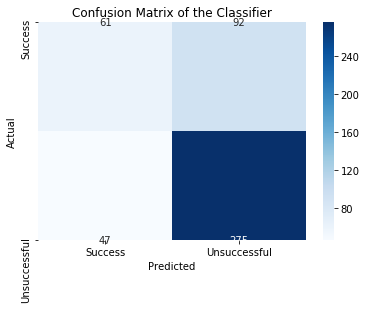

In [26]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Success', 'Unsuccessful'])

In [27]:
# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.6263650387691309

In [28]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7079, 0.7074, 0.6264]


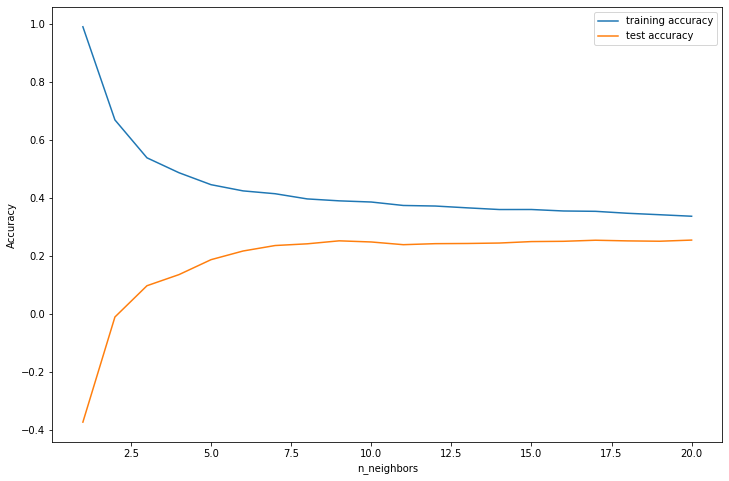

The optimal number of neighbors is: 20


In [29]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [30]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_df_dropped_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(original_df_dropped_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_df_dropped_target,
            random_state = 802,
            test_size = 0.25,
            stratify = original_df_dropped_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.7605
Testing  ACCURACY: 0.7137
AUC Score        : 0.5141


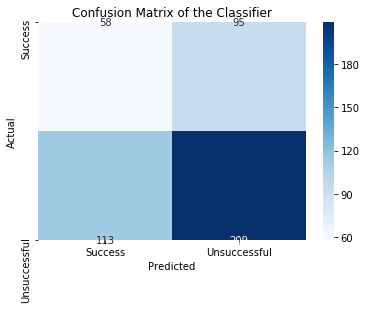

In [31]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Success', 'Unsuccessful'])

In [32]:
# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7079, 0.7074, 0.6264]
['KNN Classification', 0.7605, 0.7137, 0.6876]


In [33]:
#### Uploading more stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz       
from sklearn.externals.six import StringIO     
from IPython.display import Image              
import pydotplus                               

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [34]:
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [35]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(4))

Training ACCURACY: 0.9979
Testing  ACCURACY: 0.72
AUC Score        : 0.6786


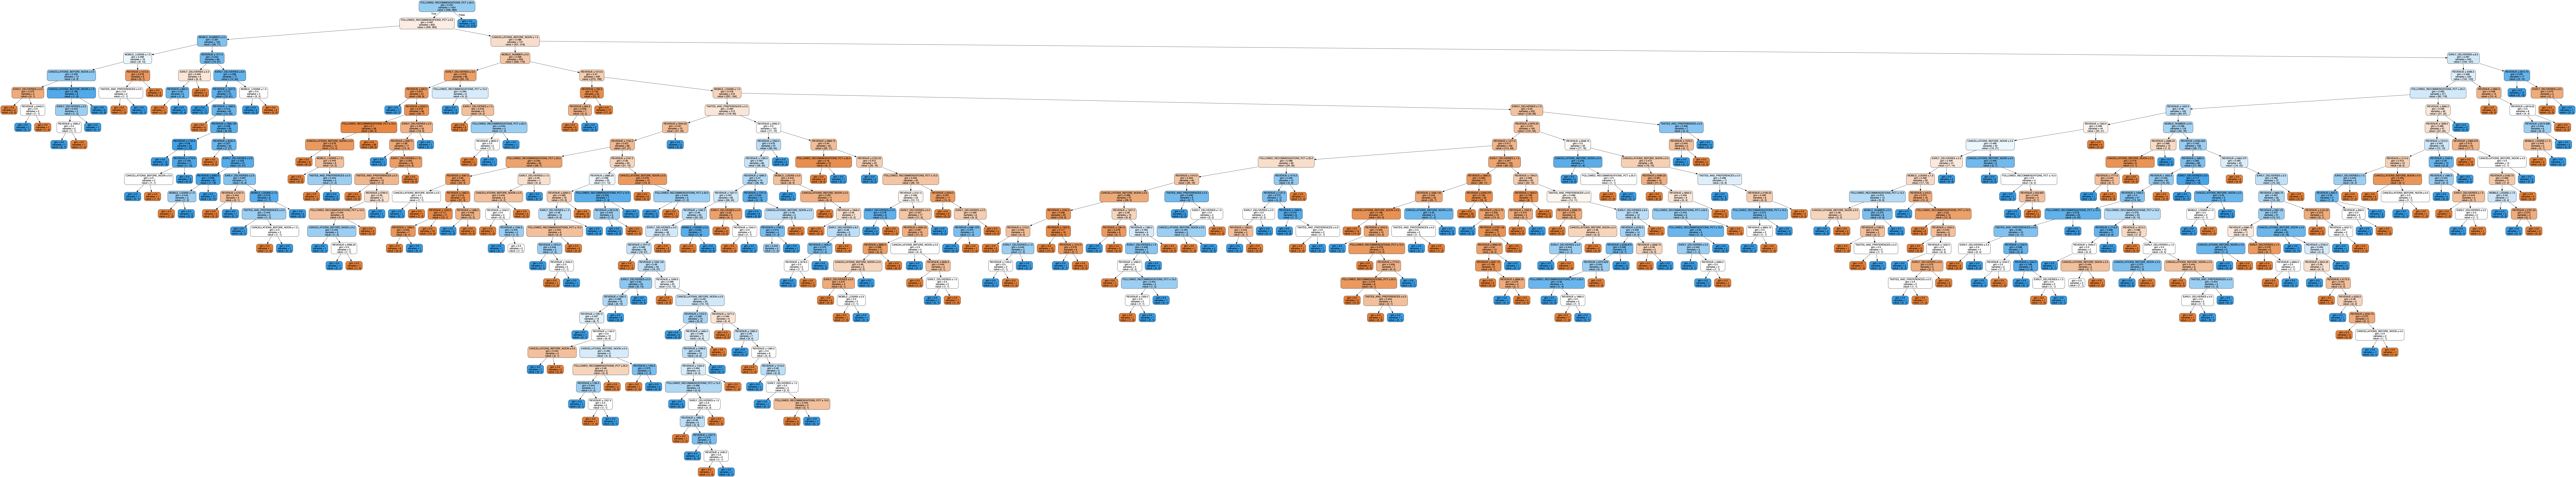

In [36]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

In [37]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.7079, 0.7074, 0.6264]
['KNN Classification', 0.7605, 0.7137, 0.6876]
['Full Tree', 0.9979, 0.72, 0.6786]


Training ACCURACY: 0.7809
Testing  ACCURACY: 0.7663
AUC Score        : 0.7385


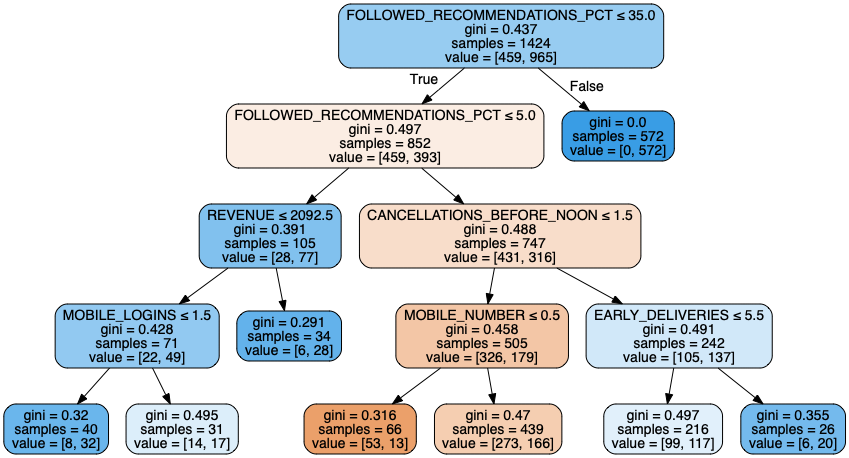

In [38]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

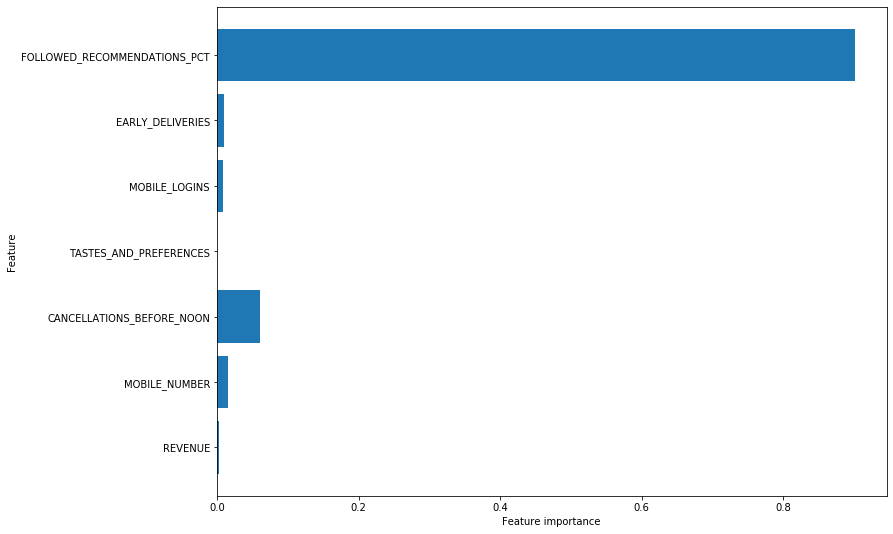

In [39]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

In [40]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7079            0.7074     0.6264
1   KNN Classification             0.7605            0.7137     0.6876
2            Full Tree             0.9979            0.7200     0.6786
3          Pruned Tree             0.7809            0.7663     0.7385

<h2><span style="color: #808000;">Checkpoint:</span></h2>
<blockquote>
<p><span style="color: #000000;">The numbers we see above is the summary of the values of the models we built. It is clear that the "<em>Full Tree</em>" has the highest score, garnering almost an entire point. This tells us that with the scoring function of our tree, we are able to make our insights accordingly. However, for the analyst's visual convenience, we are steering away from the Full Tree because the analyst has self-respect.&nbsp;</span></p>
</blockquote>

In [41]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

In [42]:
##### Uploading packages once again
import matplotlib.pyplot as plt                      # data visualization
import pandas as pd                                  # data science essentials
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import roc_auc_score            # auc score


# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [43]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [44]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 802)

In [45]:
# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

Training ACCURACY: 0.7079
Testing  ACCURACY: 0.7074
AUC Score        : 0.6264


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [46]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)



In [47]:
##### loading data and setting display options

# loading model performance
model_performance = pd.read_excel('Classification Model Performance.xlsx')

#Checking Previous Model
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7079            0.7074     0.6264
1   KNN Classification             0.7605            0.7137     0.6876
2            Full Tree             0.9979            0.7200     0.6786
3          Pruned Tree             0.7809            0.7663     0.7385

In [48]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 802)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_df_dropped_data, original_df_dropped_target)

# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

Tuned Parameters  : {'C': 1.8000000000000003, 'warm_start': True}
Tuned CV AUC      : 0.5906


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [49]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7044
Testing  ACCURACY: 0.7158
AUC Score        : 0.6634


In [50]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


#
model_performance = model_performance.append(
                          {'Model'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Value'          : lr_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7079            0.7074     0.6264
1   KNN Classification             0.7605            0.7137     0.6876
2            Full Tree             0.9979            0.7200     0.6786
3          Pruned Tree             0.7809            0.7663     0.7385
4             Tuned LR             0.7044            0.7158     0.6634

<h2><span style="color: #808000;">Checkpoint:</span></h2>
<blockquote>
<p><span style="color: #000000;">Another summary of values of our models. So far, we see that the Tree still behilds the higher score compared to our Tuned Logistic Regression.&nbsp;</span></p>
</blockquote>

In [51]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_df_dropped_data, original_df_dropped_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 69, 'splitter': 'best'}
Tuned Training AUC: 0.651


In [52]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7844
Testing  ACCURACY: 0.7768
AUC Score        : 0.7702


In [53]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Tuned Tree',
                          'Training Accuracy'  : tree_train_acc,
                          'Testing Accuracy'   : tree_test_acc,
                          'AUC Value'          : tree_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7079            0.7074     0.6264
1   KNN Classification             0.7605            0.7137     0.6876
2            Full Tree             0.9979            0.7200     0.6786
3          Pruned Tree             0.7809            0.7663     0.7385
4             Tuned LR             0.7044            0.7158     0.6634
5           Tuned Tree             0.7844            0.7768     0.7702

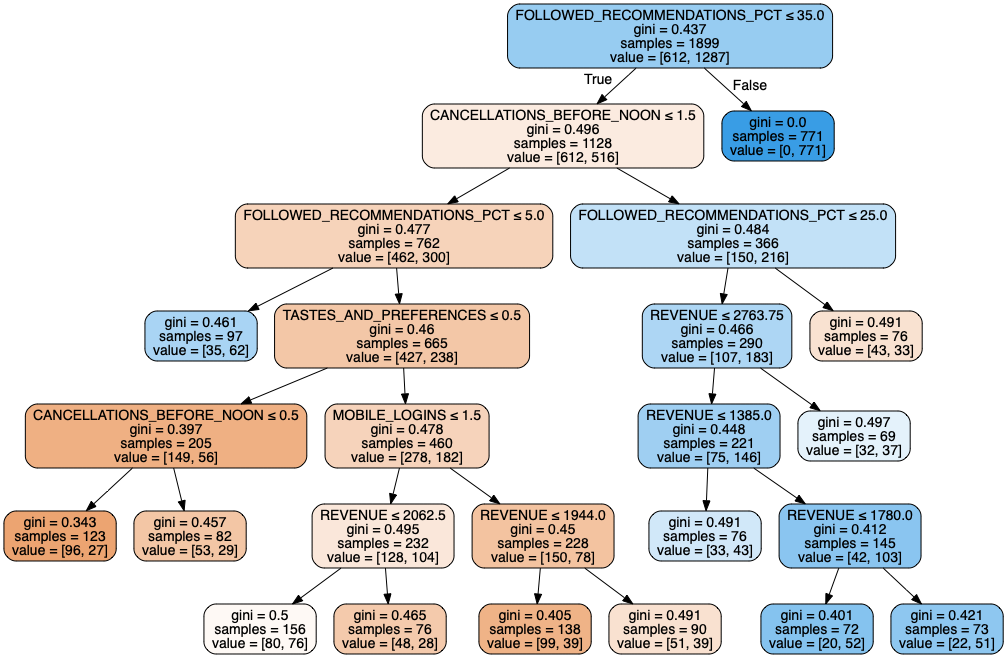

In [54]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = original_df_dropped_data,
             height = 1500,
             width  = 1200)

In [55]:
# saving the DataFrame to Excel
model_performance.to_excel('Classification Model Performance.xlsx',
                           index = False)

In [56]:
##### More packages to upload


import matplotlib.pyplot as plt                     
import pandas as pd                                 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score           
from sklearn.model_selection import GridSearchCV    
from sklearn.metrics import make_scorer            

from sklearn.ensemble import RandomForestClassifier   
from sklearn.ensemble import GradientBoostingClassifier 


In [57]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

In [58]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

In [59]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9768
Testing  ACCURACY: 0.7579
AUC Score        : 0.7254


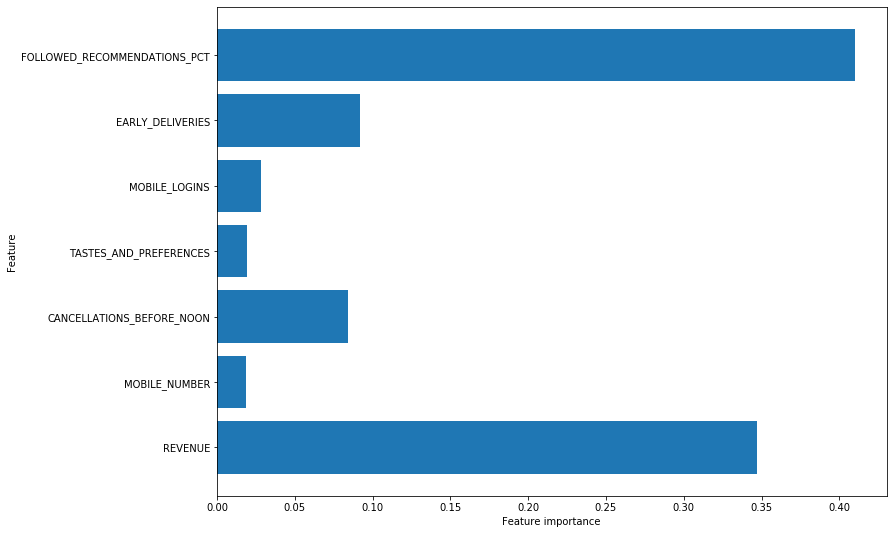

In [60]:
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

In [61]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'Random Forest',
                          'Training Accuracy'  : rf_train_acc,
                          'Testing Accuracy'   : rf_test_acc,
                          'AUC Value'          : rf_auc},
                          ignore_index = True)


# checking the results
model_performance

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.7079            0.7074     0.6264
1   KNN Classification             0.7605            0.7137     0.6876
2            Full Tree             0.9979            0.7200     0.6786
3          Pruned Tree             0.7809            0.7663     0.7385
4             Tuned LR             0.7044            0.7158     0.6634
5           Tuned Tree             0.7844            0.7768     0.7702
6        Random Forest             0.9768            0.7579     0.7254

In [62]:
# train/test split with the logit_sig variables
original_df_dropped_data   =  original_df_dropped.loc[ : , candidate_dict['logit_full']]
original_df_dropped_target =  original_df_dropped.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            original_df_dropped_data,
            original_df_dropped_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = original_df_dropped_target)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
